In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; 
from sklearn import metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
news = fetch_20newsgroups(subset='all')
print("Number of articles: " + str(len(news.data)))
print("Number of diffrent categories: " + str(len(news.target_names)))
labels = news.target_names
print(labels);

Number of articles: 18846
Number of diffrent categories: 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.2, random_state=11)
def train(classifier, X_train, y_train):
    classifier.fit(X_train, y_train);
    print("Accuracy: " + str(classifier.score(X_test, y_test)));
    return classifier

In [ ]:
#tf-idf
MLRTfIdf = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))), ('classifier', LogisticRegression(solver='newton-cg', multi_class='multinomial'))])
MLRTfIdfClassifier = train(MLRTfIdf,X_train, y_train)
#print(naiveBayesTfIdfClassifier);

Accuracy: 0.9079575596816977


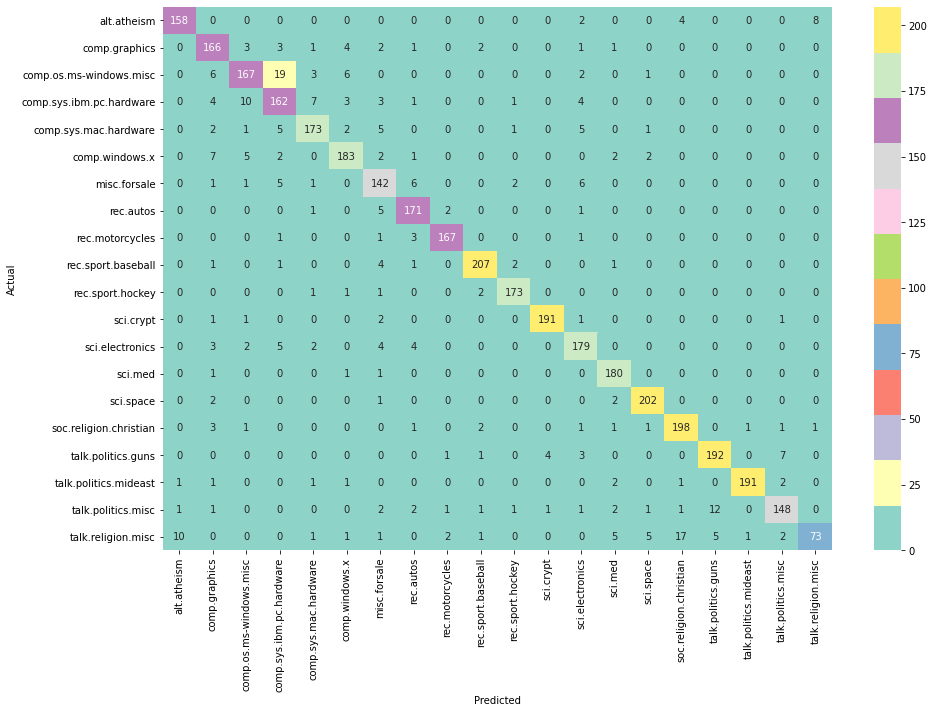

In [ ]:
y_pred_MLRTfIdfClassifier = MLRTfIdfClassifier.predict(X_test)
conf_mat_MLRTfIdfClassifier = confusion_matrix(y_test, y_pred_MLRTfIdfClassifier)
# Plot confusion_matrix
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat_MLRTfIdfClassifier, annot=True, cmap = "Set3", fmt ="d",
xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred_MLRTfIdfClassifier, target_names=labels))

                          precision    recall  f1-score   support

             alt.atheism       0.93      0.92      0.92       172
           comp.graphics       0.83      0.90      0.87       184
 comp.os.ms-windows.misc       0.87      0.82      0.85       204
comp.sys.ibm.pc.hardware       0.80      0.83      0.81       195
   comp.sys.mac.hardware       0.91      0.89      0.90       195
          comp.windows.x       0.91      0.90      0.90       204
            misc.forsale       0.81      0.87      0.84       164
               rec.autos       0.90      0.95      0.92       180
         rec.motorcycles       0.97      0.97      0.97       173
      rec.sport.baseball       0.96      0.95      0.96       217
        rec.sport.hockey       0.96      0.97      0.97       178
               sci.crypt       0.97      0.97      0.97       197
         sci.electronics       0.86      0.90      0.88       199
                 sci.med       0.92      0.98      0.95       183
         

In [ ]:
#bag of words model
MLRBOW = Pipeline([ ('vectorizer', CountVectorizer(stop_words=stopwords.words('english'))), ('classifier', LogisticRegression(solver='newton-cg', multi_class='multinomial'))])
MLRBOWClassifier = train(MLRBOW, news.data, news.target)

Accuracy: 1.0


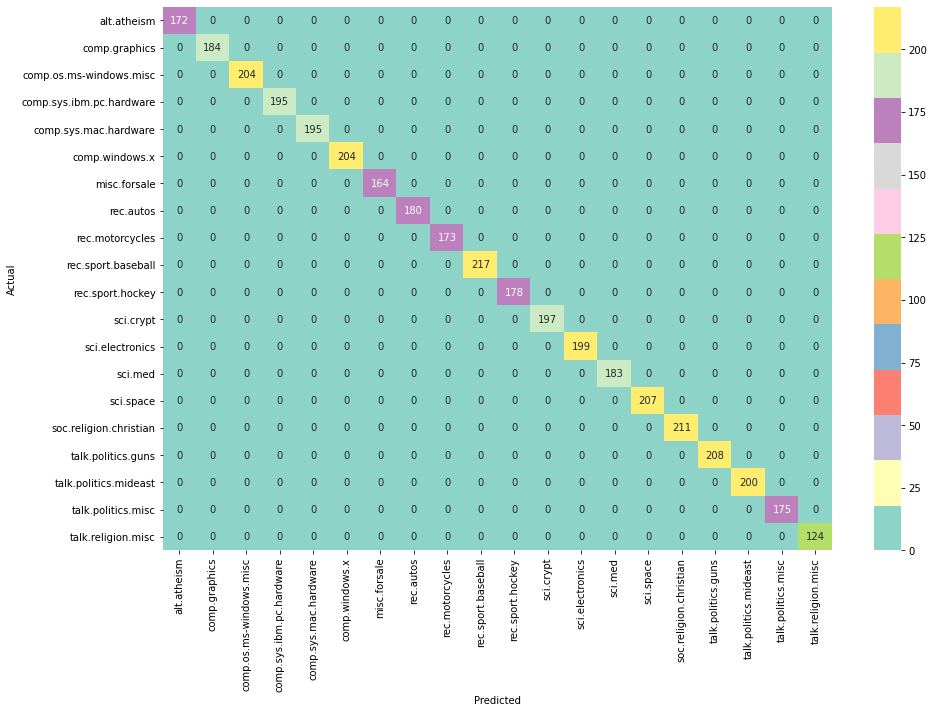

In [ ]:
y_pred_MLRBOWClassifier = MLRBOWClassifier.predict(X_test)
conf_mat_MLRBOWClassifier = confusion_matrix(y_test, y_pred_MLRBOWClassifier)
# Plot confusion_matrix
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat_MLRBOWClassifier, annot=True, cmap = "Set3", fmt ="d",
xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred_MLRBOWClassifier, target_names=labels))
print("done")

                          precision    recall  f1-score   support

             alt.atheism       1.00      1.00      1.00       172
           comp.graphics       1.00      1.00      1.00       184
 comp.os.ms-windows.misc       1.00      1.00      1.00       204
comp.sys.ibm.pc.hardware       1.00      1.00      1.00       195
   comp.sys.mac.hardware       1.00      1.00      1.00       195
          comp.windows.x       1.00      1.00      1.00       204
            misc.forsale       1.00      1.00      1.00       164
               rec.autos       1.00      1.00      1.00       180
         rec.motorcycles       1.00      1.00      1.00       173
      rec.sport.baseball       1.00      1.00      1.00       217
        rec.sport.hockey       1.00      1.00      1.00       178
               sci.crypt       1.00      1.00      1.00       197
         sci.electronics       1.00      1.00      1.00       199
                 sci.med       1.00      1.00      1.00       183
         

In [ ]:
#bigram  
MLRBigram = Pipeline([ ('vectorizer', CountVectorizer(ngram_range = (2,2), stop_words=stopwords.words('english'))), ('classifier', LogisticRegression(solver='newton-cg', multi_class='multinomial'))])
MLRBigramClassifier = train(MLRBigram, news.data, news.target)
#print(naiveBayesBigramClassifier);

Accuracy: 1.0


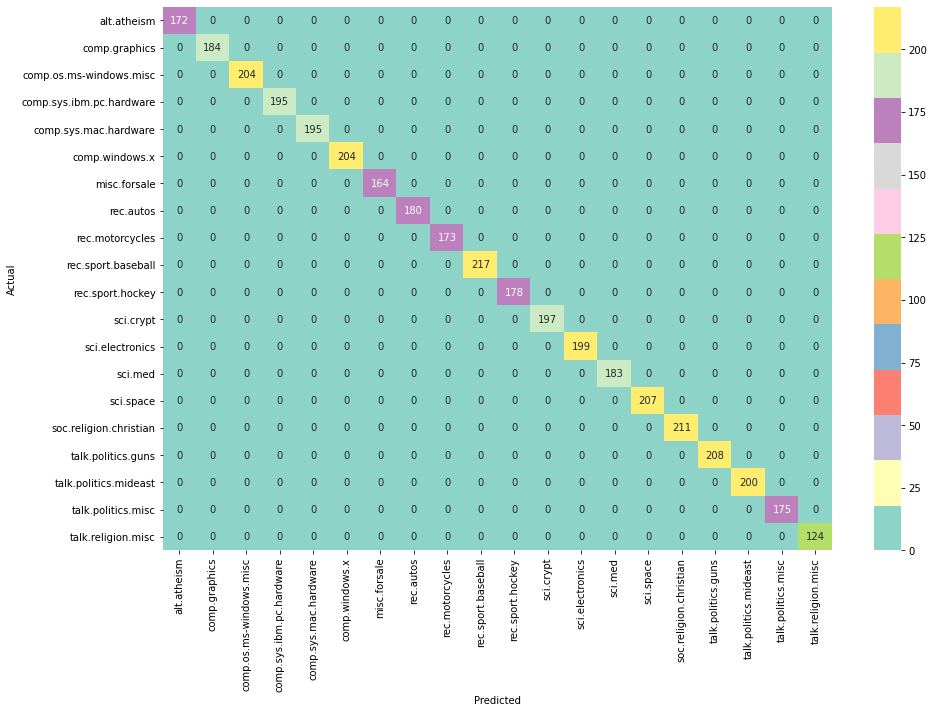

In [ ]:
y_pred_MLRBigram = MLRBigramClassifier.predict(X_test)
conf_mat_MLRBigramClassifier = confusion_matrix(y_test, y_pred_MLRBigram)
# Plot confusion_matrix
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat_MLRBigramClassifier, annot=True, cmap = "Set3", fmt ="d",
xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred_MLRBigram, target_names=labels))

                          precision    recall  f1-score   support

             alt.atheism       1.00      1.00      1.00       172
           comp.graphics       1.00      1.00      1.00       184
 comp.os.ms-windows.misc       1.00      1.00      1.00       204
comp.sys.ibm.pc.hardware       1.00      1.00      1.00       195
   comp.sys.mac.hardware       1.00      1.00      1.00       195
          comp.windows.x       1.00      1.00      1.00       204
            misc.forsale       1.00      1.00      1.00       164
               rec.autos       1.00      1.00      1.00       180
         rec.motorcycles       1.00      1.00      1.00       173
      rec.sport.baseball       1.00      1.00      1.00       217
        rec.sport.hockey       1.00      1.00      1.00       178
               sci.crypt       1.00      1.00      1.00       197
         sci.electronics       1.00      1.00      1.00       199
                 sci.med       1.00      1.00      1.00       183
         

In [ ]:
#trigram
MLRTrigram = Pipeline([ ('vectorizer', CountVectorizer(ngram_range = (3,3), stop_words=stopwords.words('english'))), ('classifier', LogisticRegression(solver='newton-cg', multi_class='multinomial'))])
MLRTrigramClassifier = train(MLRTrigram, news.data, news.target)
#print(SVMTrigramClassifier);

Accuracy: 1.0


In [ ]:
y_pred_MLRTrigramClassifier = MLRTrigramClassifier.predict(X_test)
conf_mat_MLRTrigram = confusion_matrix(y_test, y_pred_MLRTrigramClassifier)
# Plot confusion_matrix
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat_MLRTrigram, annot=True, cmap = "Set3", fmt ="d",
xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred_MLRTrigramClassifier, target_names=labels))